In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [17]:
import tensorflow
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [25]:
X = X_train[:1000]
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
X.shape

(1000, 3072)

In [26]:
def show_random_image(X):
    plt.figure()
    i = (int)(random.random() * X.shape[0])
    plt.imshow(X[i].reshape(32, 32, 3))
    plt.show()
    plt.close()

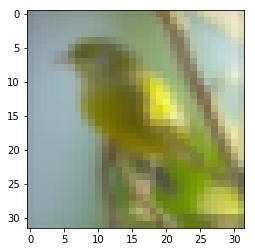

In [27]:
show_random_image(X)

In [28]:
X = X/255

We need to first demean the image data

In [29]:
X -= X.mean(axis=0)
X.mean(axis=0)

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

Implement the ZCA whitening

In [31]:
U, S, Vt = np.linalg.svd(X)
XZ = U @ np.diag(1/S + 1e-5) @ U.T @ X
XZ = (XZ - XZ.min()) / (XZ.max() - XZ.min())

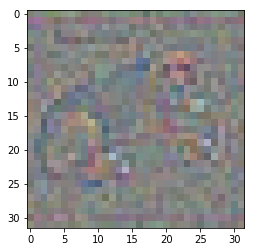

In [35]:
show_random_image(XZ)